In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os

In [2]:
##credit to https://www.kaggle.com/viswajithkn/fraud-detection and https://www.kaggle.com/pavelvpster/ieee-fraud-eda-lightgbm-baseline
print(os.listdir())

['.ipynb_checkpoints', 'ieee fraud detection.ipynb', 'sample_submission.csv', 'test_identity.csv', 'test_transaction.csv', 'train_identity.csv', 'train_transaction.csv']


In [3]:
%%time
train_transaction = pd.read_csv('train_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('train_identity.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)

del train_transaction, train_identity

Wall time: 26.9 s


In [4]:
train.head().T

TransactionID,2987000,2987001,2987002,2987003,2987004
isFraud,0,0,0,0,0
TransactionDT,86400,86401,86469,86499,86506
TransactionAmt,68.5,29,59,50,50
ProductCD,W,W,W,W,H
card1,13926,2755,4663,18132,4497
...,...,...,...,...,...
id_36,NaN,NaN,NaN,NaN,F
id_37,NaN,NaN,NaN,NaN,T
id_38,NaN,NaN,NaN,NaN,T
DeviceType,NaN,NaN,NaN,NaN,mobile


In [5]:
%%time

test_transaction = pd.read_csv('test_transaction.csv', index_col='TransactionID')

test_identity = pd.read_csv('test_identity.csv', index_col='TransactionID')

test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

del test_transaction, test_identity

Wall time: 27.7 s


In [6]:
test.shape

(506691, 432)

In [7]:
selected_features = [
    'TransactionAmt', 'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
    'P_emaildomain', 'R_emaildomain',
    'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
    'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15',
    'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
    'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
    'V13', 'V17', 'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36',
    'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V51',
    'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63',
    'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V78',
    'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
    'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128',
    'V130', 'V131', 'V138', 'V139', 'V140', 'V143', 'V145', 'V146', 'V147', 'V149',
    'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161', 'V162',
    'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173',
    'V175', 'V176', 'V177', 'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189',
    'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207',
    'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219',
    'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
    'V231', 'V233', 'V234', 'V238', 'V239', 'V242', 'V243', 'V244', 'V245', 'V246',
    'V247', 'V249', 'V251', 'V253', 'V256', 'V257', 'V258', 'V259', 'V261', 'V262',
    'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273',
    'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285',
    'V287', 'V288', 'V289', 'V291', 'V292', 'V294', 'V303', 'V304', 'V306', 'V307',
    'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322', 'V323', 'V324',
    'V326', 'V329', 'V331', 'V332', 'V333', 'V335', 'V336', 'V338',
    'id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09', 'id_11', 'id_12', 'id_13', 'id_14',
    'id_15', 'id_17', 'id_19', 'id_20', 'id_30', 'id_31', 'id_32', 'id_33', 'id_36', 'id_37',
    'id_38', 'DeviceType', 'DeviceInfo'
]
len(selected_features)

279

In [8]:
columns_to_drop = list(set(train.columns) - set(selected_features) - set(['isFraud', 'TransactionDT']))
len(columns_to_drop)


152

In [9]:
columns_to_drop

['V305',
 'V117',
 'V320',
 'V153',
 'V300',
 'V55',
 'V311',
 'id_29',
 'V133',
 'V339',
 'V123',
 'V28',
 'V119',
 'V15',
 'V39',
 'V299',
 'V121',
 'V108',
 'V25',
 'V254',
 'V103',
 'V179',
 'V27',
 'V132',
 'V281',
 'V1',
 'V168',
 'id_26',
 'id_21',
 'V22',
 'V101',
 'V50',
 'id_35',
 'V252',
 'V148',
 'V328',
 'V302',
 'V114',
 'V135',
 'V309',
 'V298',
 'V113',
 'V57',
 'V134',
 'V111',
 'V136',
 'V24',
 'V68',
 'V181',
 'V240',
 'V337',
 'V105',
 'V109',
 'V98',
 'V18',
 'id_23',
 'C3',
 'V65',
 'V14',
 'V230',
 'V250',
 'V142',
 'id_34',
 'V107',
 'V120',
 'id_18',
 'V79',
 'V88',
 'V77',
 'V330',
 'V185',
 'V196',
 'V194',
 'V236',
 'V260',
 'V193',
 'V31',
 'V67',
 'V297',
 'V157',
 'V248',
 'V110',
 'V106',
 'V325',
 'V232',
 'V296',
 'V118',
 'V141',
 'V269',
 'V186',
 'id_22',
 'V2',
 'V102',
 'V115',
 'V316',
 'V32',
 'V16',
 'id_28',
 'id_04',
 'id_27',
 'V125',
 'V116',
 'V301',
 'id_08',
 'V26',
 'id_10',
 'V66',
 'V334',
 'V144',
 'V192',
 'V295',
 'V41',
 'id_16',


In [10]:
train = train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)
train.shape

(590540, 281)

In [11]:
#train['null_columns'] = train.isna().sum(axis=1)
#test['null_columns'] = test.isna().sum(axis=1)

In [12]:
#l = len(train.columns) - 1
#train['null_percent'] = train['null_columns'] / l

In [13]:
#test['null_percent'] = test['null_columns'] / l

In [14]:
train = train.fillna(-999)
test = test.fillna(-999)

In [15]:
#many_same_values_columns_train = [c for c in train.columns if train[c].value_counts(normalize=True).values[0] > 0.9]

In [16]:
#many_same_values_columns_test = [c for c in test.columns if test[c].value_counts(normalize=True).values[0] > 0.9]

In [17]:
#columns_to_drop = list(set(many_same_values_columns_train + many_same_values_columns_test))

#columns_to_drop.remove('isFraud')

#len(columns_to_drop)

In [18]:
#many_same_values_columns_train

In [19]:
import re

In [20]:
os = ['Windows', 'iOS', 'Android', 'Mac OS', 'Linux']

browser = ['chrome', 'mobile safari', 'ie', 'safari', 'edge', 'firefox']

device = ['Windows', 'iOS', 'MacOS', 'SM', 'SAMSUNG', 'Moto', 'LG']

def to_pattern(x: str, patterns):
    for p in patterns:
        t = re.compile('^(' + p + ').*')
        if t.match(x):
            return p
    return 'other'

def make_os_feature(df):
    return df['id_30'].map(lambda x: to_pattern(str(x), os))

def make_browser_feature(df):
    return df['id_31'].map(lambda x: to_pattern(str(x), browser))

def make_device_feature(df):
    return df['DeviceInfo'].map(lambda x: to_pattern(str(x), device))

In [21]:
train['os'] = make_os_feature(train)
train['browser'] = make_browser_feature(train)
train['device'] = make_device_feature(train)

test['os'] = make_os_feature(test)
test['browser'] = make_browser_feature(test)
test['device'] = make_device_feature(test)

In [22]:
temp = pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False)

train['card1_count'] = train['card1'].map(temp)

test['card1_count'] = test['card1'].map(temp)

del temp

In [23]:
def features_interaction(df, feature_1, feature_2):
    return df[feature_1].astype(str) + '_' + df[feature_2].astype(str)

In [24]:
# Based on https://www.kaggle.com/nroman/lgb-single-model-lb-0-9419

features_interactions = [
    'id_02__id_20',
    'id_02__D8',
    'D11__DeviceInfo',
    'DeviceInfo__P_emaildomain',
    'P_emaildomain__C2',
    'card2__dist1',
    'card1__card5',
    'card2__id_20',
    'card5__P_emaildomain',
    'addr1__card1'
]

for new_feature in features_interactions:
    feature_1, feature_2 = new_feature.split('__')
    
    train[new_feature] = features_interaction(train, feature_1, feature_2)
    test[new_feature] = features_interaction(test, feature_1, feature_2)

In [25]:
train.head().T

TransactionID,2987000,2987001,2987002,2987003,2987004
isFraud,0,0,0,0,0
TransactionDT,86400,86401,86469,86499,86506
TransactionAmt,68.5,29,59,50,50
ProductCD,W,W,W,W,H
card1,13926,2755,4663,18132,4497
...,...,...,...,...,...
card2__dist1,-999.0_19.0,404.0_-999.0,490.0_287.0,567.0_-999.0,514.0_-999.0
card1__card5,13926_142.0,2755_102.0,4663_166.0,18132_117.0,4497_102.0
card2__id_20,-999.0_-999.0,404.0_-999.0,490.0_-999.0,567.0_-999.0,514.0_144.0
card5__P_emaildomain,142.0_-999,102.0_gmail.com,166.0_outlook.com,117.0_yahoo.com,102.0_gmail.com


In [26]:
# From https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature

def make_day_feature(df, offset=0.58, tname='TransactionDT'):
    """
    Creates a day of the week feature, encoded as 0-6.
    """
    days = df[tname] / (3600 * 24)
    encoded_days = np.floor(days - 1 + offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23.
    """
    hours = df[tname] / (3600)
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

(0, 1000)

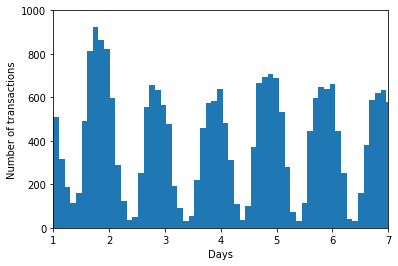

In [27]:
plt.hist(train['TransactionDT'] / (3600 * 24), bins=1800)
plt.xlim(1, 7)
plt.xlabel('Days')
plt.ylabel('Number of transactions')
plt.ylim(0,1000)

In [28]:
train['Weekday'] = make_day_feature(train)

Text(0, 0.5, 'Fraction of fraudulent transactions')

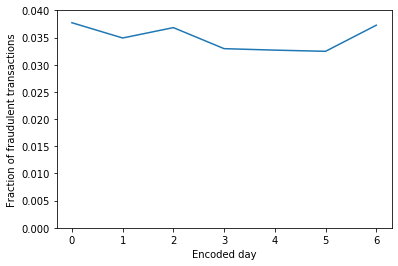

In [29]:
plt.plot(train.groupby('Weekday').mean()['isFraud'])
plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')

In [30]:
train['Hour'] = make_hour_feature(train)

Text(0, 0.5, 'Fraction of fraudulent transactions')

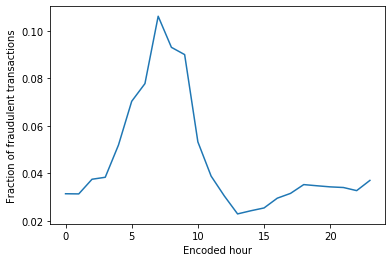

In [31]:
plt.plot(train.groupby('Hour').mean()['isFraud'])
plt.xlabel('Encoded hour')
plt.ylabel('Fraction of fraudulent transactions')

In [32]:
test['Weekday'] = make_day_feature(test)
test['Hour'] = make_hour_feature(test)

In [33]:
email_vendors = {
    'gmail': 'google',
    'att.net': 'att',
    'twc.com': 'spectrum',
    'scranton.edu': 'other',
    'optonline.net': 'other',
    'hotmail.co.uk': 'microsoft',
    'comcast.net': 'other',
    'yahoo.com.mx': 'yahoo',
    'yahoo.fr': 'yahoo',
    'yahoo.es': 'yahoo',
    'charter.net': 'spectrum',
    'live.com': 'microsoft',
    'aim.com': 'aol',
    'hotmail.de': 'microsoft',
    'centurylink.net': 'centurylink',
    'gmail.com': 'google',
    'me.com': 'apple',
    'earthlink.net': 'other',
    'gmx.de': 'other',
    'web.de': 'other',
    'cfl.rr.com': 'other',
    'hotmail.com': 'microsoft',
    'protonmail.com': 'other',
    'hotmail.fr': 'microsoft',
    'windstream.net': 'other',
    'outlook.es': 'microsoft',
    'yahoo.co.jp': 'yahoo',
    'yahoo.de': 'yahoo',
    'servicios-ta.com': 'other',
    'netzero.net': 'other',
    'suddenlink.net': 'other',
    'roadrunner.com': 'other',
    'sc.rr.com': 'other',
    'live.fr': 'microsoft',
    'verizon.net': 'yahoo',
    'msn.com': 'microsoft',
    'q.com': 'centurylink',
    'prodigy.net.mx': 'att',
    'frontier.com': 'yahoo',
    'anonymous.com': 'other',
    'rocketmail.com': 'yahoo',
    'sbcglobal.net': 'att',
    'frontiernet.net': 'yahoo',
    'ymail.com': 'yahoo',
    'outlook.com': 'microsoft',
    'mail.com': 'other',
    'bellsouth.net': 'other',
    'embarqmail.com': 'centurylink',
    'cableone.net': 'other',
    'hotmail.es': 'microsoft',
    'mac.com': 'apple',
    'yahoo.co.uk': 'yahoo',
    'netzero.com': 'other',
    'yahoo.com': 'yahoo',
    'live.com.mx': 'microsoft',
    'ptd.net': 'other',
    'cox.net': 'other',
    'aol.com': 'aol',
    'juno.com': 'other',
    'icloud.com': 'apple',
    -999: 'undefined'
}

us_emails = ['gmail', 'net', 'edu']

In [34]:
def transform_email(df, column):
    out = pd.DataFrame(index=df.index)
    
    # vendor
    out[column + '_vendor'] = df[column].map(email_vendors)
    
    # suffix
    out[column + '_suffix'] = df[column].map(lambda x: str(x).split('.')[-1])
    
    # US
    out[column + '_us'] = out[column + '_suffix'].map(lambda x: 'us' if str(x) in us_emails else 'other')
    
    return out

In [35]:
temp = transform_email(train, 'P_emaildomain')

train = train.merge(temp, how='left', left_index=True, right_index=True)

temp = transform_email(train, 'R_emaildomain')

train = train.merge(temp, how='left', left_index=True, right_index=True)

del temp

In [36]:
train.shape

(590540, 303)

In [37]:
temp = transform_email(test, 'P_emaildomain')

test = test.merge(temp, how='left', left_index=True, right_index=True)

temp = transform_email(test, 'R_emaildomain')

test = test.merge(temp, how='left', left_index=True, right_index=True)

del temp

In [38]:
train = train.sort_values('TransactionDT').drop('TransactionDT', axis=1)
test = test.sort_values('TransactionDT').drop('TransactionDT', axis=1)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
def encode_categorial_features_fit(df, columns_to_encode):
    encoders = {}
    for c in columns_to_encode:
        if c in df.columns:
            encoder = LabelEncoder()
            encoder.fit(df[c].astype(str).values)
            encoders[c] = encoder
    return encoders

def encode_categorial_features_transform(df, encoders):
    out = pd.DataFrame(index=df.index)
    for c in encoders.keys():
        if c in df.columns:
            out[c] = encoders[c].transform(df[c].astype(str).values)
    return out

In [41]:
categorial_features_columns = [
    'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21',
    'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31',
    'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
    'DeviceType', 'DeviceInfo', 'ProductCD', 'P_emaildomain', 'R_emaildomain',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
    'addr1', 'addr2',
    'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
    'P_emaildomain_vendor', 'P_emaildomain_suffix', 'P_emaildomain_us',
    'R_emaildomain_vendor', 'R_emaildomain_suffix', 'R_emaildomain_us'  ,
     'os', 'browser', 'device'
] + features_interactions

categorial_features_encoders = encode_categorial_features_fit(
    pd.concat([train, test], join='outer', sort=False),
    categorial_features_columns)

In [42]:
temp = encode_categorial_features_transform(train, categorial_features_encoders)

columns_to_drop = list(set(categorial_features_columns) & set(train.columns))

train = train.drop(columns_to_drop, axis=1).merge(temp, how='left', left_index=True, right_index=True)

del temp

In [43]:
train.shape

(590540, 302)

In [44]:
train.head().T


TransactionID,2987000,2987001,2987002,2987003,2987004
isFraud,0.0,0.0,0.0,0.0,0.0
TransactionAmt,68.5,29.0,59.0,50.0,50.0
dist1,19.0,-999.0,287.0,-999.0,-999.0
C1,1.0,1.0,1.0,2.0,1.0
C2,1.0,1.0,1.0,5.0,1.0
...,...,...,...,...,...
card2__dist1,152.0,18436.0,23504.0,29551.0,25477.0
card1__card5,4648.0,10937.0,13000.0,9637.0,12822.0
card2__id_20,0.0,5346.0,6827.0,8730.0,7295.0
card5__P_emaildomain,550.0,98.0,804.0,224.0,98.0


In [45]:
temp = encode_categorial_features_transform(test, categorial_features_encoders)

columns_to_drop = list(set(categorial_features_columns) & set(test.columns))

test = test.drop(columns_to_drop, axis=1).merge(temp, how='left', left_index=True, right_index=True)

del temp

In [46]:
# From https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
#        else:
#            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1263.51 MB
Memory usage after optimization is: 383.82 MB
Decreased by 69.6%
Memory usage of dataframe is 1083.08 MB
Memory usage after optimization is: 338.92 MB
Decreased by 68.7%


In [47]:
y_train = train['isFraud'].copy()
x_train = train.drop('isFraud', axis=1)
#del train

In [48]:
x_test = test.copy()
#del test

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression(penalty='l2',
                   dual=False,
                   tol=0.0001,
                   C=1.0,
                   fit_intercept=True,
                   intercept_scaling=1,
                   class_weight=None,
                   random_state=0)

In [55]:
%%time
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 12min 34s


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y = lr.predict(x_test)

In [67]:
data = {'TransactionID':x_test.index,'isFraud':y}
submissionDF = pd.DataFrame(data)
submissionDF.to_csv('lr_submission.csv',index=False)